# Plotting cell types associated with Hassall's

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import warnings 
import scipy.stats
from collections import Counter
import os

warnings.filterwarnings('ignore')
#os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot/')
#import scvi_wrapper as s_w
import statsmodels.api as sm

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

sc.logging.print_header()
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi = 200, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf',fontsize=10)
plt.rcParams["figure.figsize"] = [6,6]
# sns.set_palette('colorblind')
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [3]:
sc.settings.set_figure_params(dpi = 150, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf',fontsize=10)

In [4]:
adata_full = sc.read(path)

In [5]:
adata_full.obs.loc[adata_full.obs['age_group']!='fetal']

n_genes                        sample_barcode  \
barcode                                                                      
GSM4466783-TGCGGGTGTTTCGGCG     5769           GSM4466783-TGCGGGTGTTTCGGCG   
GSM4466783-GTCACTCTCTGCGATA     5840           GSM4466783-GTCACTCTCTGCGATA   
GSM4466783-GTCTAGAAGTGGTTCT     5922           GSM4466783-GTCTAGAAGTGGTTCT   
GSM4466783-CTTGATTCAGCGAACA     5950           GSM4466783-CTTGATTCAGCGAACA   
GSM4466783-CCTCCTCCAATACCTG     6360           GSM4466783-CCTCCTCCAATACCTG   
...                              ...                                   ...   
TA13072427-GACCTGGTCGTTTAGG      634  U48-THY-0-SC-1_5GEX-GACCTGGTCGTTTAGG   
TA13072427-TAGTGGTAGTGGGTTG      461  U48-THY-0-SC-1_5GEX-TAGTGGTAGTGGGTTG   
TA13072427-CGTCACTTCTCGAGTA      558  U48-THY-0-SC-1_5GEX-CGTCACTTCTCGAGTA   
TA13072427-AGAGTGGAGTAGCCGA      449  U48-THY-0-SC-1_5GEX-AGAGTGGAGTAGCCGA   
TA13072427-CGTAGCGGTGTGTGCC      423  U48-THY-0-SC-1_5GEX-CGTAGCGGTGTGTGCC   

                             batch chemistry age_group age_numeric  \
barcode                                                              
GSM4466783-TGCGGGTGTTTCGGCG    111      3GEX    infant         0.2   
GSM4466783-GTCACTCTCTGCGATA    111      3GEX    infant         0.2   
GSM4466783-GTCTAGAAGTGGTTCT    111      3GEX    infant         0.2   
GSM4466783-CTTGATTCAGCGAACA    111      3GEX    infant         0.2   
GSM4466783-CCTCCTCCAATACCTG    111      3GEX    infant         0.2   
...                            ...       ...       ...         ...   
TA13072427-GACCTGGTCGTTTAGG    154      5'v2    infant           6   
TA13072427-TAGTGGTAGTGGGTTG    154      5'v2    infant           6   
TA13072427-CGTCACTTCTCGAGTA    154      5'v2    infant           6   
TA13072427-AGAGTGGAGTAGCCGA    154      5'v2    infant           6   
TA13072427-CGTAGCGGTGTGTGCC    154      5'v2    infant           6   

                            sampleID_TCRab  \
barcode                                      
GSM4466783-TGCGGGTGTTTCGGCG            NaN   
GSM4466783-GTCACTCTCTGCGATA            NaN   
GSM4466783-GTCTAGAAGTGGTTCT            NaN   
GSM4466783-CTTGATTCAGCGAACA            NaN   
GSM4466783-CCTCCTCCAATACCTG            NaN   
...                                    ...   
TA13072427-GACCTGGTCGTTTAGG     TA13072430   
TA13072427-TAGTGGTAGTGGGTTG     TA13072430   
TA13072427-CGTCACTTCTCGAGTA     TA13072430   
TA13072427-AGAGTGGAGTAGCCGA     TA13072430   
TA13072427-CGTAGCGGTGTGTGCC     TA13072430   

                                                                    path_TCRab  \
barcode                                                                          
GSM4466783-TGCGGGTGTTTCGGCG                                                NaN   
GSM4466783-GTCACTCTCTGCGATA                                                NaN   
GSM4466783-GTCTAGAAGTGGTTCT                                                NaN   
GSM4466783-CTTGATTCAGCGAACA                                                NaN   
GSM4466783-CCTCCTCCAATACCTG                                                NaN   
...                                                                        ...   
TA13072427-GACCTGGTCGTTTAGG  lustre/scratch126/cellgen/cellgeni/tickets/tic...   
TA13072427-TAGTGGTAGTGGGTTG  lustre/scratch126/cellgen/cellgeni/tickets/tic...   
TA13072427-CGTCACTTCTCGAGTA  lustre/scratch126/cellgen/cellgeni/tickets/tic...   
TA13072427-AGAGTGGAGTAGCCGA  lustre/scratch126/cellgen/cellgeni/tickets/tic...   
TA13072427-CGTAGCGGTGTGTGCC  lustre/scratch126/cellgen/cellgeni/tickets/tic...   

                              type                   study  \
barcode                                                      
GSM4466783-TGCGGGTGTTTCGGCG  cells            Bautista2021   
GSM4466783-GTCACTCTCTGCGATA  cells            Bautista2021   
GSM4466783-GTCTAGAAGTGGTTCT  cells            Bautista2021   
GSM4466783-CTTGATTCAGCGAACA  cells            Bautista2021   
GSM4466783-CCTCCTCCAATACCTG  cells            Bautista2021   
...

In [6]:
adata_paed = sc.read_h5ad(path1)

In [182]:
adata_paed_filt = adata_paed[adata_paed.obs['tot_cell_abundance']>30,:].copy()
adata_paed_filt = adata_paed_filt[adata_paed_filt.obs['n_genes_by_counts']>1000,:].copy()

In [183]:
adata_paed_cma = adata_paed_filt[((adata_paed_filt.obs['annotations_level_1']!="fat")&
                                (adata_paed_filt.obs['annotations_level_0']!="Artifacts")),:].copy()

## remove meduala less lobules 
adata_paed_cma.obs['full_lobule'] = 0
for s in adata_paed_cma.obs['SampleID'].cat.categories.tolist():
    sample = adata_paed_cma[adata_paed_cma.obs['SampleID'].isin([s])]
    for l in sample.obs['annotations_lobules_0'].cat.categories:
        lobule = sample.obs['annotations_lobules_0'] == l
        med = np.where(sample.obs['annotations_level_0'][lobule] == 'Medulla')[0]
        cortex = np.where(sample.obs['annotations_level_0'][lobule] == 'Cortex')[0]
        if (cortex.size>=3) & (med.size>=3):
            adata_paed_cma.obs['full_lobule'][lobule.iloc[np.where(lobule)].index] = 1
adata_paed_cma.obs['full_lobule'] = adata_paed_cma.obs['full_lobule'].astype('category')
adata_paed_cma.obs['full_lobule'].value_counts()
adata_paed_cma = adata_paed_cma[adata_paed_cma.obs['full_lobule']==1] # remove spots that don't have either medullar or cortical data


1    22517
0     2941
Name: full_lobule, dtype: int64

In [184]:
adata_paed_hc = adata_paed_cma.copy()

### Cell type analysis (Visium)

In [216]:
celltypes = adata_paed_cma.uns['mod']['factor_names']
cellab_paed_hc = sc.AnnData(adata_paed_cma.obs[celltypes], 
                         obs = adata_paed_cma.obs.drop(celltypes, axis = 1),obsm = adata_paed_cma.obsm)

cellab_paed_hc.layers['raw_abn'] = cellab_paed_hc.X.copy()

sc.pp.normalize_total(cellab_paed_hc,target_sum=100)

cellab_paed_hc = cellab_paed_hc[(cellab_paed_hc.obs['cma_v2']>0.1) &
                                (cellab_paed_hc.obs['L2_dist_annotations_level_1_HS']<=175),:].copy()

In [217]:
# version 3 hybrid
def mean_space(adata_vis,anno,threshold = 0.5,minspots=25,exp=True):
    space_map = {}
    for c in adata_vis.var_names:
        cells_above = np.where(adata_vis.X[:,np.where(adata_vis.var_names==c)]>threshold)[0]
        if len(cells_above)>minspots:
            obs_ind = np.where(adata_vis.obs.columns == anno)[0]
            cell_abn = np.squeeze(adata_vis.X[cells_above,np.where(adata_vis.var_names==c)])                      
            axis_value =  np.squeeze(np.array(adata_vis.obs.iloc[cells_above,obs_ind]))
            if exp:
                temp = np.dot(cell_abn,axis_value)/np.sum(cell_abn)-0.13
                space_map[c] = np.sign(temp)*np.power(temp,2)
            else:
                space_map[c] = (np.dot(cell_abn,axis_value)/np.sum(cell_abn))
    return space_map

In [218]:
space_map_cma = mean_space(cellab_paed_hc,'cma_v2',threshold=2.5,minspots=10, exp=False)
for i in space_map_cma:
    space_map_cma[i] = space_map_cma[i]
    if space_map_cma[i]<0.1:
        space_map_cma[i] = None # remove cells that are not medullar centered  

space_map_hc = mean_space(cellab_paed_hc,'L2_dist_annotations_level_1_HS',threshold=2.5,minspots=10,exp=False)  
for i in space_map_hc:
    space_map_hc[i] = space_map_hc[i]*2 # correct back to linear and micron distance ppm=0.5 hence the 2 
    space_map_hc[i] = space_map_hc[i] # correct back to linear and micron distance ppm=0.5 hence the 2 
    if not space_map_cma[i]:
        space_map_hc[i] = None # remove cells that are not medullar centered  

In [219]:
df_vis = pd.DataFrame.from_dict({'space_map_cma': space_map_cma, 'space_map_hc': space_map_hc}, orient='index').T.dropna()

In [220]:
df_vis.sort_values(['space_map_hc'])

space_map_cma space_map_hc
mTECIII               0.641046    59.561357
TEC-cilliated         0.692417    63.395561
mTECI-trans           0.679344    81.031296
TEC-neuro             0.587255    99.791925
mTECII                0.631547    123.46845
T_CD8_memory          0.604623   125.201345
T_Treg-diff_2         0.680819   149.032105
TEC-myo               0.657907   150.663287
B-naive                0.66886   150.789516
T_Treg_recirc         0.655795   154.966179
aDC1                  0.617217   158.044265
pDC                    0.59604   160.663844
T_Treg-diff_1         0.603123   164.131003
mTECI                 0.561678   168.765667
B-memory              0.574406   174.086311
T_Treg_CD8            0.573094   180.124263
T_NK                  0.658891   189.702016
medFB-MHCIIh          0.579953   190.666155
T_Treg(agonist)       0.509297   193.164384
EC-Art-ELN            0.555963   193.850314
T_CD4                 0.448067    209.84438
medFb                 0.608352   215.892995
aDC2                  0.564239   231.010866
T_CD8αα(II)           0.620075    233.08019
DC2                    0.54069   240.968553
medFb-RGS5             0.53425     241.4615
SMC                   0.475076   245.578235
Macrophage-APOC2       0.44406   264.224293
B-plasma              0.469208   266.949177
DC1                   0.422113   268.559794
T_CD8                 0.247426   285.797996
aDC3                  0.581471   288.332033
EC-Art                0.295147   335.691434
EC-Ven                0.200261   345.251977
Myelocyte             0.262622   408.822453
T_CD8αα(I)            0.159795   459.476633

Text(0.5, 0, 'CMA')

Text(0, 0.5, 'Distance to Hassall(μm)')

(0.4, 0.75)

(0.0, 350.0)

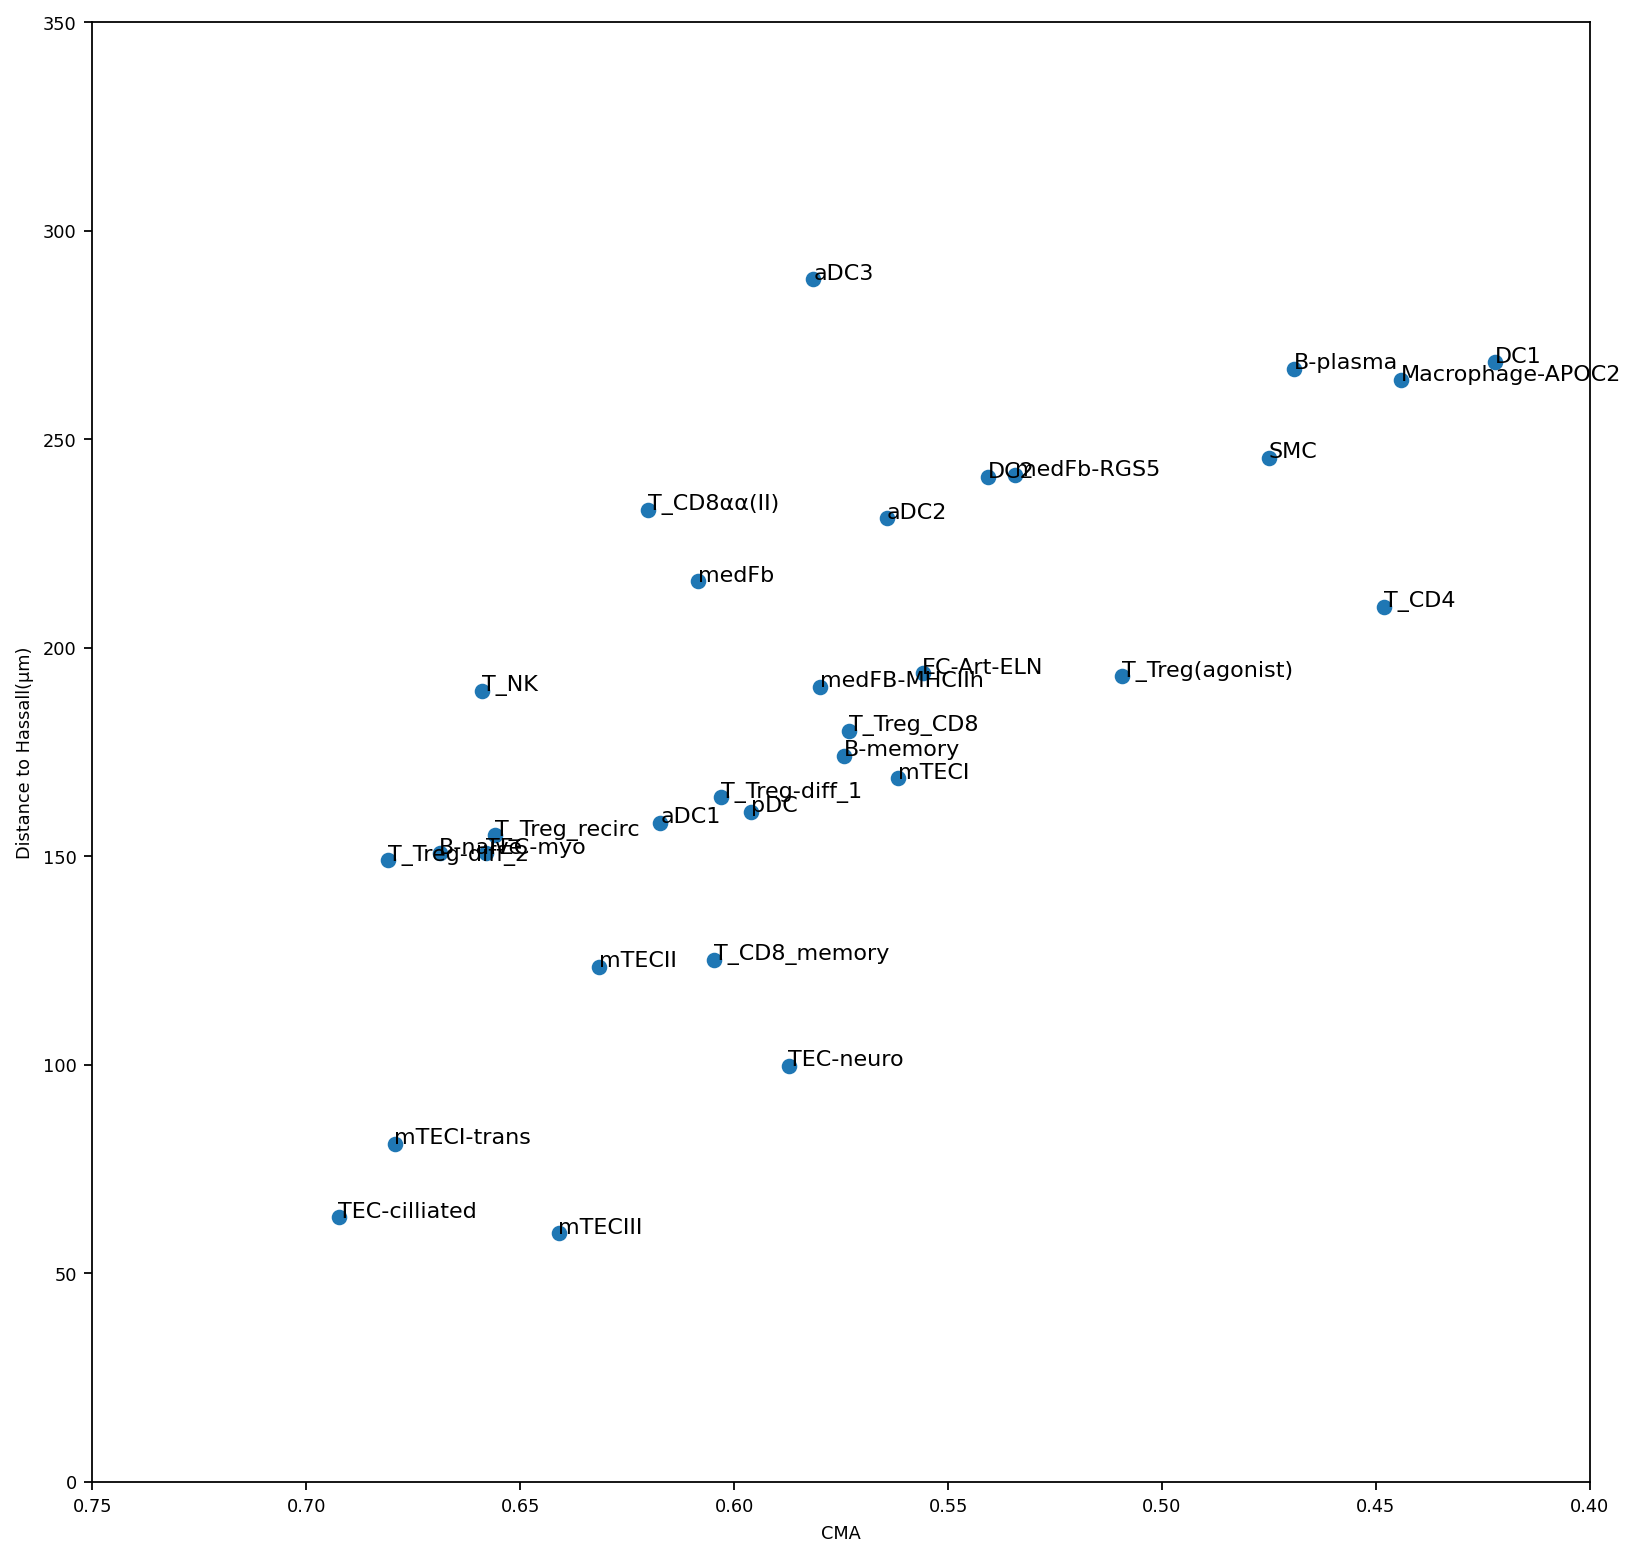

In [221]:
# plot the scatter plot
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from adjustText import adjust_text
# plot the scatter plot
sc.set_figure_params(figsize=[12,12],fontsize=8)
# Fit a polynomial of degree 1 robust (linear fit)
x = np.array(df_vis['space_map_cma']).astype('float32')
y = np.array(df_vis['space_map_hc']).astype('float32')

# Fit a robust regression model

# Plot the data points
plt.scatter(x, y, label='Data')

# Plot the robust regression line
#plt.plot(x, results.predict(sm.add_constant(x)), color='red', label='Robust Regression')
# add labels for each point
#for i, label in enumerate(df_vis.index):
#    plt.annotate(label, (df_vis['space_map_cma'][i]+0.00005, df_vis['space_map_hc'][i]))
texts = [plt.annotate(label, (df_vis['space_map_cma'][i]+0.00005, df_vis['space_map_hc'][i]),fontsize=10) for i, label in enumerate(df_vis.index)]
#adjust_text(texts)
# add axis labels
plt.xlabel('CMA')
plt.ylabel("Distance to Hassall(μm)")
plt.grid(False)
#plt.legend()
plt.xlim([0.4, 0.75])
plt.ylim([0, 350])
plt.gca().invert_xaxis()
plt.savefig('figures/HC_ctypes_meanCMA_vs_meanHC_threshold2_5_allspots.pdf')
plt.show()

In [309]:
celltypes = adata_paed_cma.uns['mod']['factor_names']
cellab_paed_hc = sc.AnnData(adata_paed_cma.obs[celltypes], 
                         obs = adata_paed_cma.obs.drop(celltypes, axis = 1),obsm = adata_paed_cma.obsm)

cellab_paed_hc.layers['raw_abn'] = cellab_paed_hc.X.copy()

sc.pp.normalize_total(cellab_paed_hc,target_sum=100)

In [310]:
space_map_cma = mean_space(cellab_paed_hc,'cma_v2',threshold=1,minspots=10, exp=False)
for i in space_map_cma:
    space_map_cma[i] = space_map_cma[i]
    if space_map_cma[i]<0.1:
        space_map_cma[i] = None # remove cells that are not medullar centered  

space_map_hc = mean_space(cellab_paed_hc,'L2_dist_annotations_level_1_HS',threshold=1,minspots=10,exp=False)  
for i in space_map_hc:
    space_map_hc[i] = space_map_hc[i]*2 # correct back to linear and micron distance ppm=0.5 hence the 2 
    space_map_hc[i] = space_map_hc[i] # correct back to linear and micron distance ppm=0.5 hence the 2 
    if not space_map_cma[i]:
        space_map_hc[i] = None # remove cells that are not medullar centered  

In [311]:
df_vis = pd.DataFrame.from_dict({'space_map_cma': space_map_cma, 'space_map_hc': space_map_hc}, orient='index').T.dropna()

In [312]:
# cellab_paed_hc = cellab_paed_hc[
#                                 (cellab_paed_hc.obs['L2_dist_annotations_level_1_HS']<=175),:].copy()

In [313]:
cellab_paed_hc.obs['Hassal_dist'] = cellab_paed_hc.obs['L2_dist_annotations_level_1_HS']*2

In [314]:
cellab_paed_hc = cellab_paed_hc[(cellab_paed_hc.obs['cma_v2']>0.12) &
                                (cellab_paed_hc.obs['L2_dist_annotations_level_1_HS']<=350),:].copy()

In [315]:
cellab_paed_hc.obs['Hassal_rad'] = pd.cut(cellab_paed_hc.obs['Hassal_dist'],
                                         bins = range(0, 375, 25), include_lowest = True)

In [316]:
cellab_paed_hc.obs['Hassal_rad2'] = cellab_paed_hc.obs['Hassal_rad'].copy()
cellab_paed_hc.obs['Hassal_rad2'] = cellab_paed_hc.obs['Hassal_rad2'].astype(str)

In [317]:
cellab_paed_hc.obs.loc[cellab_paed_hc.obs['annotations_level_1'] == "HS",'Hassal_rad2'] = 'Hassal_body'

In [318]:
cellab_paed_hc.obs['Hassal_rad2'] = cellab_paed_hc.obs['Hassal_rad2'].astype('category')
cellab_paed_hc = cellab_paed_hc[cellab_paed_hc.obs['Hassal_rad2'] != 'nan']

In [319]:
new_cats = ['Hassal_body', '(-0.001, 25.0]', '(25.0, 50.0]', '(50.0, 75.0]', '(75.0, 100.0]', '(100.0, 125.0]', '(125.0, 150.0]',
            '(150.0, 175.0]', '(175.0, 200.0]', '(200.0, 225.0]', '(225.0, 250.0]', '(250.0, 275.0]', '(275.0, 300.0]', '(300.0, 325.0]','(325.0, 350.0]']

In [320]:
cellab_paed_hc.obs['Hassal_rad2'].cat.reorder_categories (new_cats, inplace = True)


In [321]:
intervals = []
for i in range(0, 350, 25):
    intervals.append(f"{i}-{i+25} μm rad")

In [322]:
cellab_paed_hc.obs['Hassal_rad2'].cat.categories = ['Hassal_body']+intervals

In [323]:
hc_ctypes = df_vis.index.copy()

In [324]:
adata_paed_hc_prox = cellab_paed_hc.copy()

In [325]:
adata_paed_hc_prox.X[adata_paed_hc_prox.X<0.05] = 0

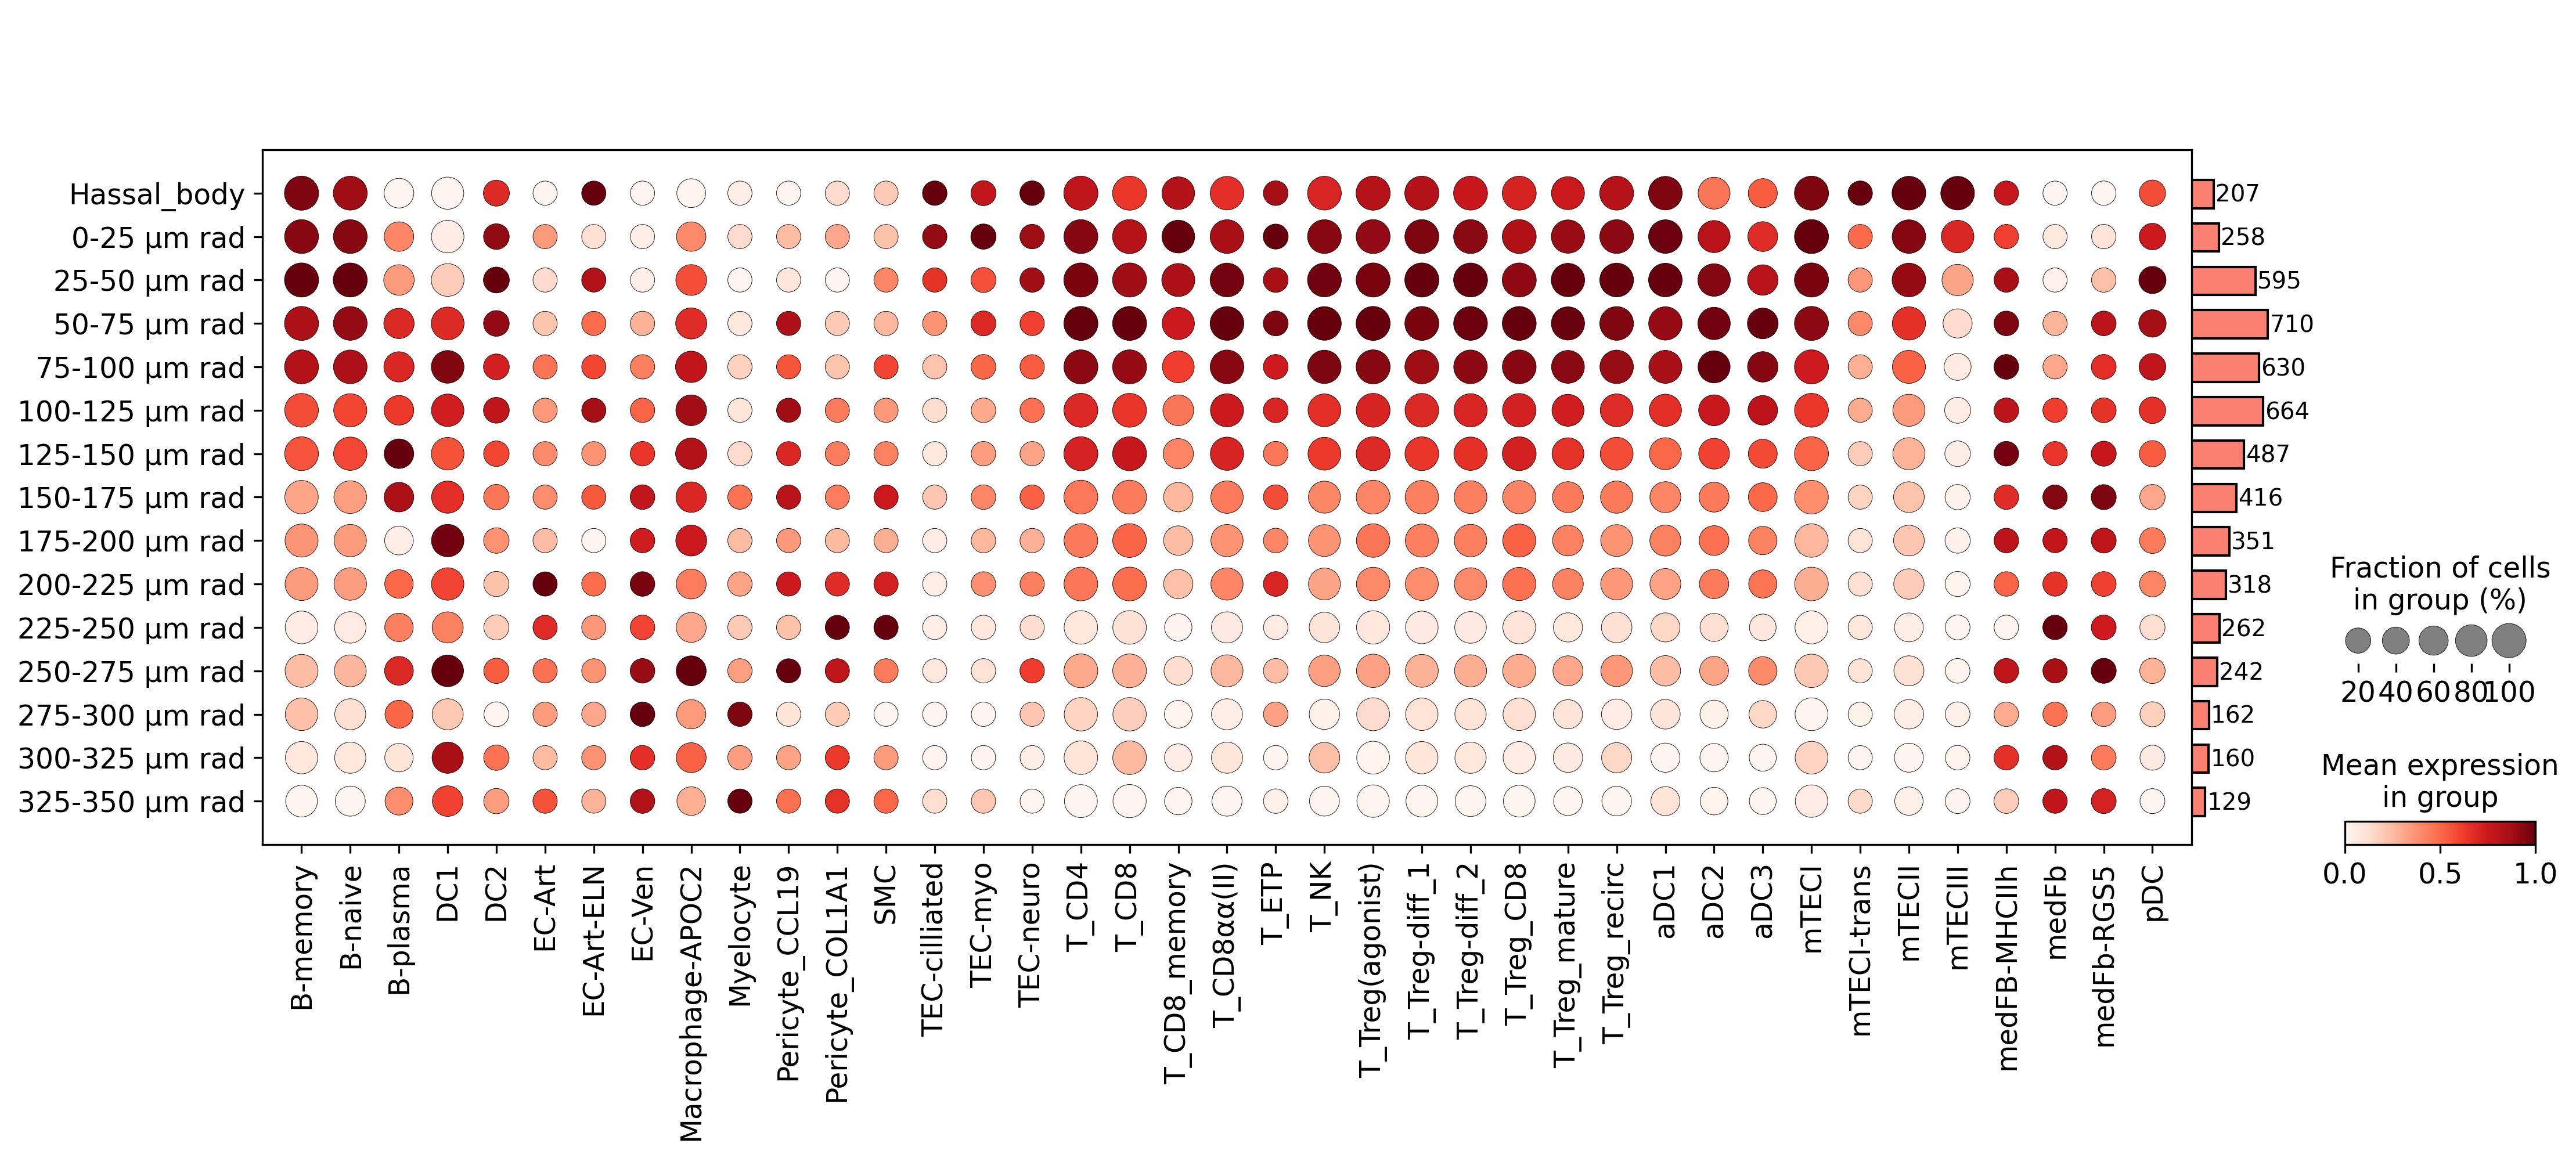

AnnData object with n_obs × n_vars = 5591 × 63
    obs: 'Sample', 'Sample_hr', 'SampleID', 'SlideID', 'Position', 'in_tissue', 'array_row', 'array_col', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'percent_mito', 'annotations_level_0', 'annotations_level_0_number', 'annotations_level_1', 'annotations_level_1_number', 'annotations_lobules_0', 'annotations_lobules_0_number', 'L2_dist_annotations_level_0_Artifacts', 'L2_dist_annotations_level_0_Cortex', 'L2_dist_annotations_level_0_Edge', 'L2_dist_annotations_level_0_Medulla', 'L2_dist_annotations_level_1_HS', 'L2_dist_annotations_level_1_PVS', 'L2_dist_annotations_level_1_fat', 'L2_dist_annotations_level_1_vessels', 'L2_dist_annotations_level_0_lymph', 'L2_dist_annotations_level_1_unassigned', 'cm', 'cc', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Image_name', 'Image_jpg', 'section_thickness (um)', 'permebialisation(min)', 'RIN/DV200', 'Visium_type', 'Funding', 'Sequencer'

In [326]:
dp = sc.pl.dotplot(adata_paed_hc_prox, var_names = hc_ctypes, groupby = 'Hassal_rad2', expression_cutoff=0.5, standard_scale = "var", return_fig=True,smallest_dot=100)
dp.add_totals()
dp.show()
adata_paed_hc_prox

ArrayView([[10.079094  ,  1.1836258 ,  1.3297491 , ...,  0.        ,
             0.        ,  0.7384839 ],
           [10.5630245 ,  2.8993132 ,  1.0777159 , ...,  0.        ,
             0.06714339,  0.37453082],
           [ 9.01865   ,  2.5812886 ,  0.7811706 , ...,  0.        ,
             0.11055781,  0.6213813 ],
           ...,
           [ 5.9751534 ,  2.273442  ,  0.74088734, ...,  0.06559251,
             0.32584828,  0.44102103],
           [ 5.595684  ,  2.1345942 ,  1.0193791 , ...,  0.05681973,
             0.17942409,  0.38869652],
           [ 2.08915   ,  0.72967577,  0.7757219 , ...,  0.10254943,
             0.13195921,  0.12351991]], dtype=float32)

['mTECIII', 'TEC-cilliated', 'mTECI-trans', 'TEC-myo', 'TEC-neuro', 'mTECII', 'mTECI', 'T_CD8_memory', 'B-memory', 'B-naive', 'aDC1', 'T_ETP', 'aDC3', 'aDC2', 'pDC', 'T_Treg(agonist)', 'T_CD4', 'T_Treg_mature', 'T_Treg-diff_2', 'T_Treg-diff_1', 'T_CD8αα(II)', 'T_Treg_CD8', 'T_CD8', 'T_Treg_recirc', 'T_NK', 'DC2', 'medFB-MHCIIh', 'Macrophage-APOC2', 'DC1', 'medFb-RGS5', 'Pericyte_CCL19', 'B-plasma', 'EC-Art-ELN', 'SMC', 'EC-Art', 'Pericyte_COL1A1', 'medFb', 'EC-Ven', 'Myelocyte']


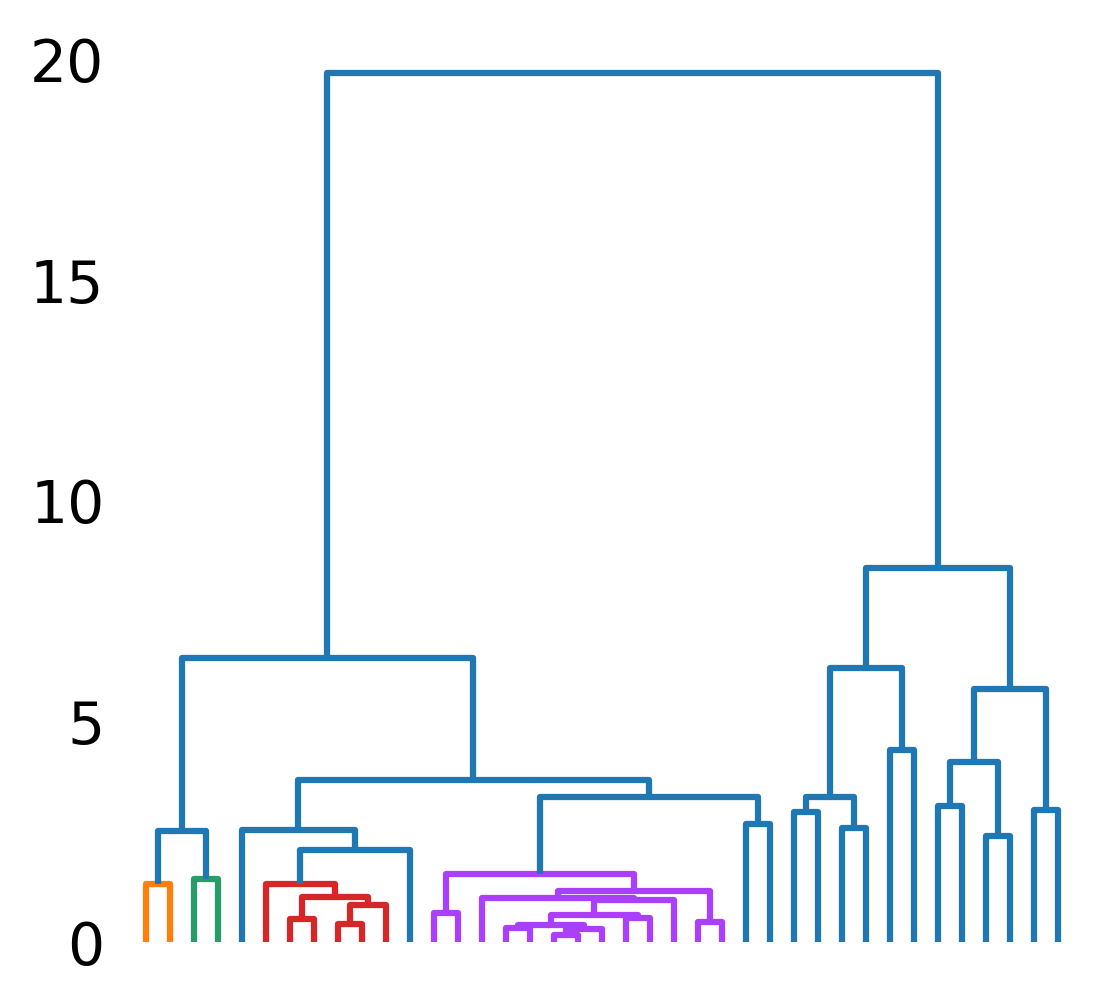

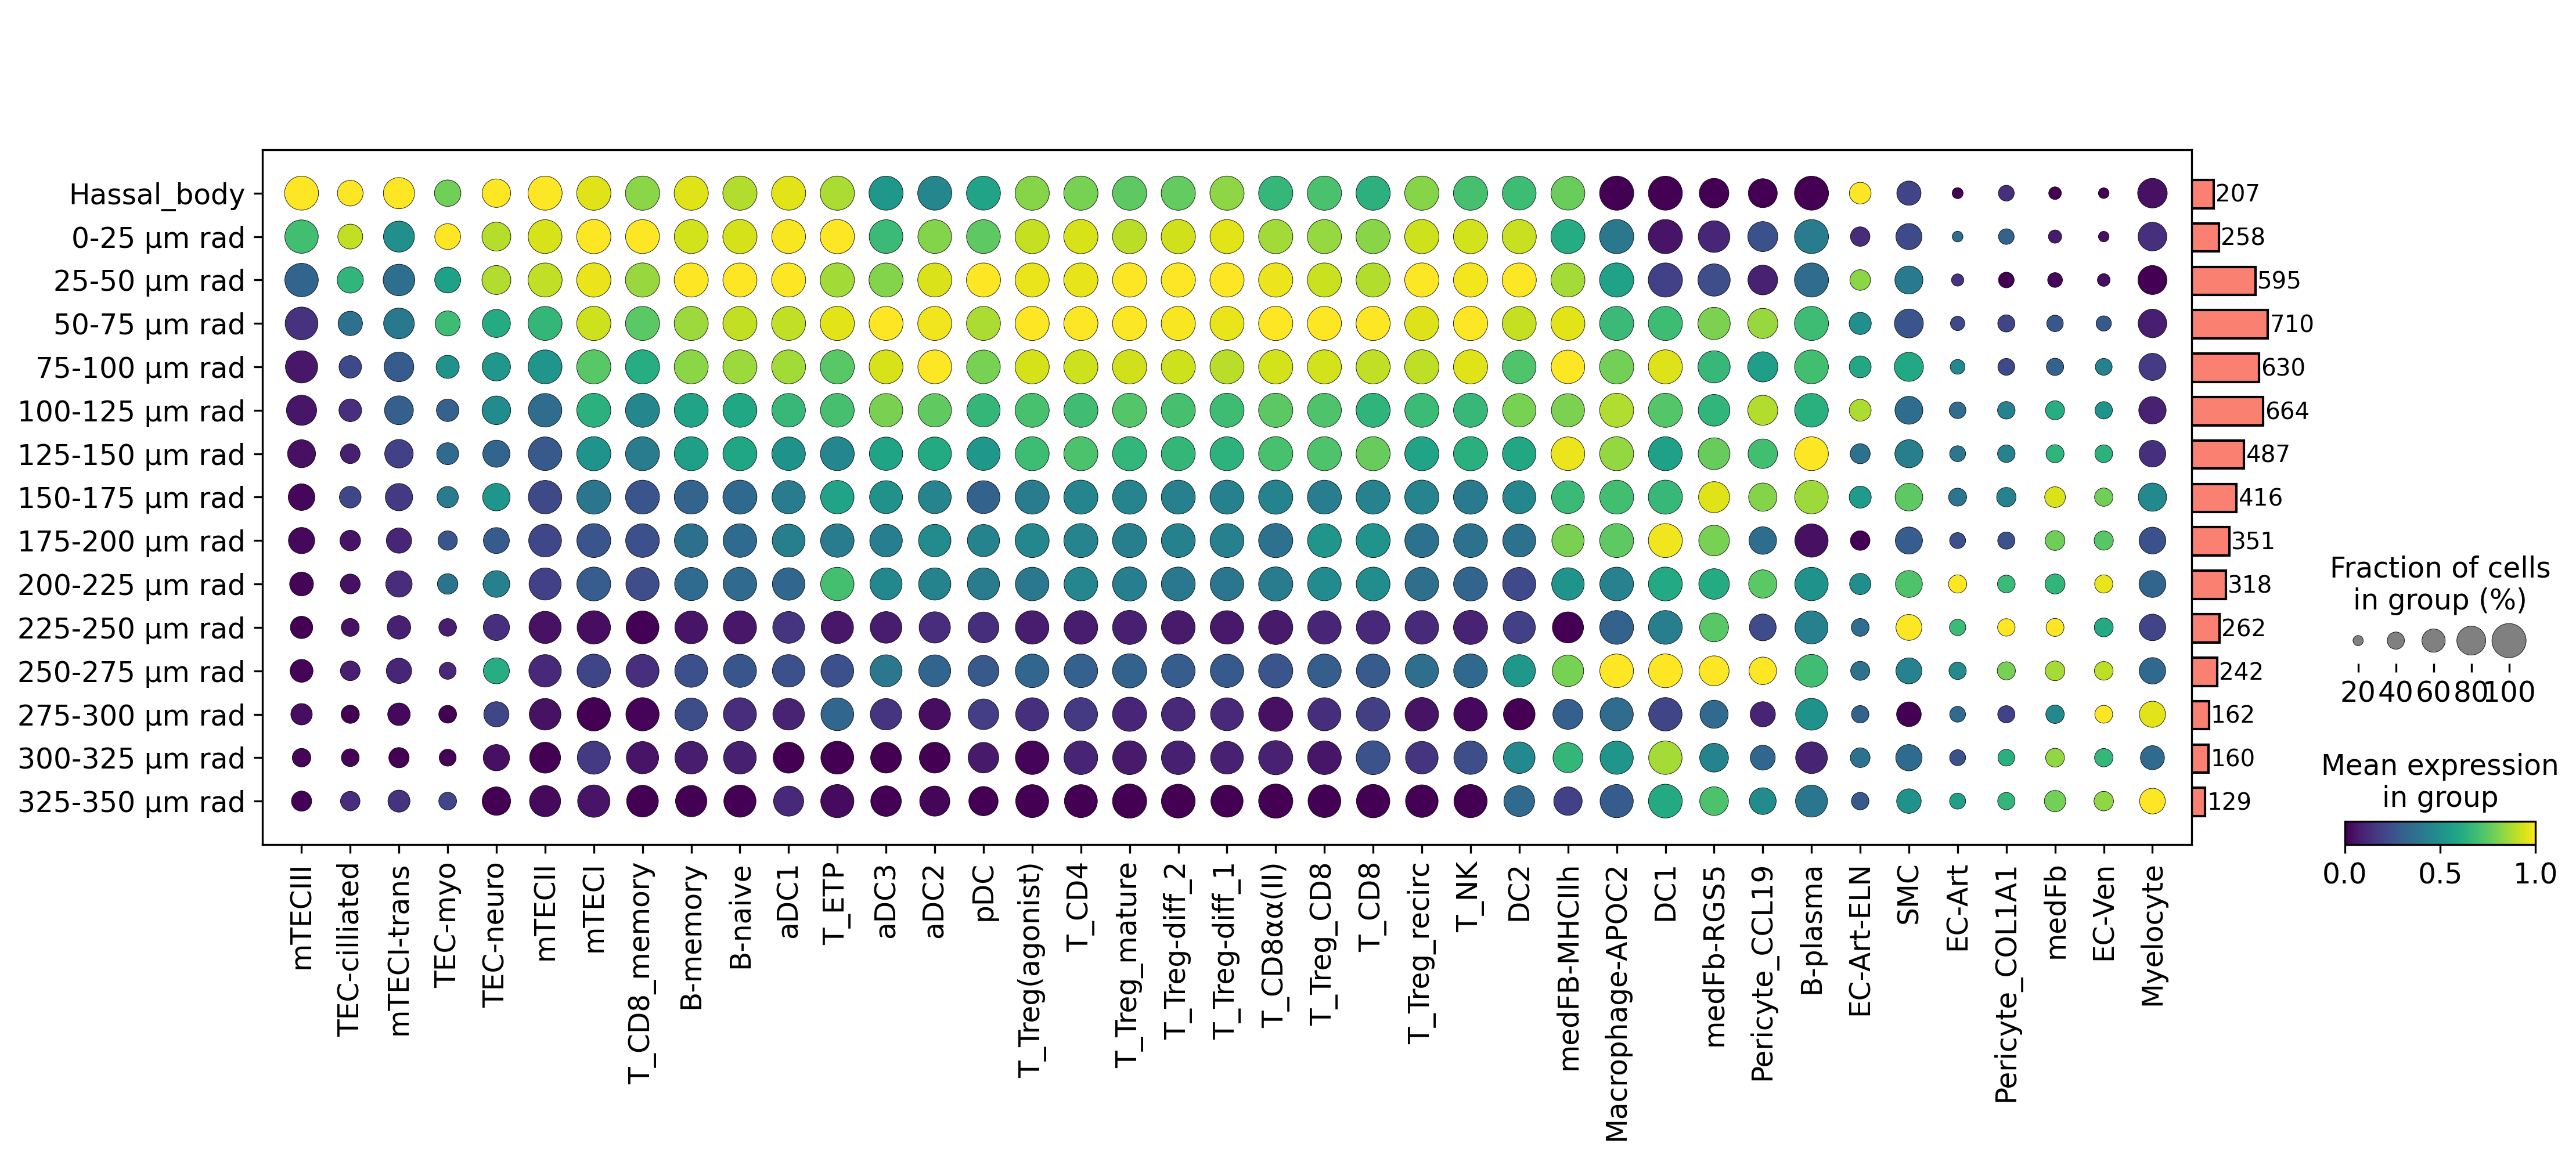

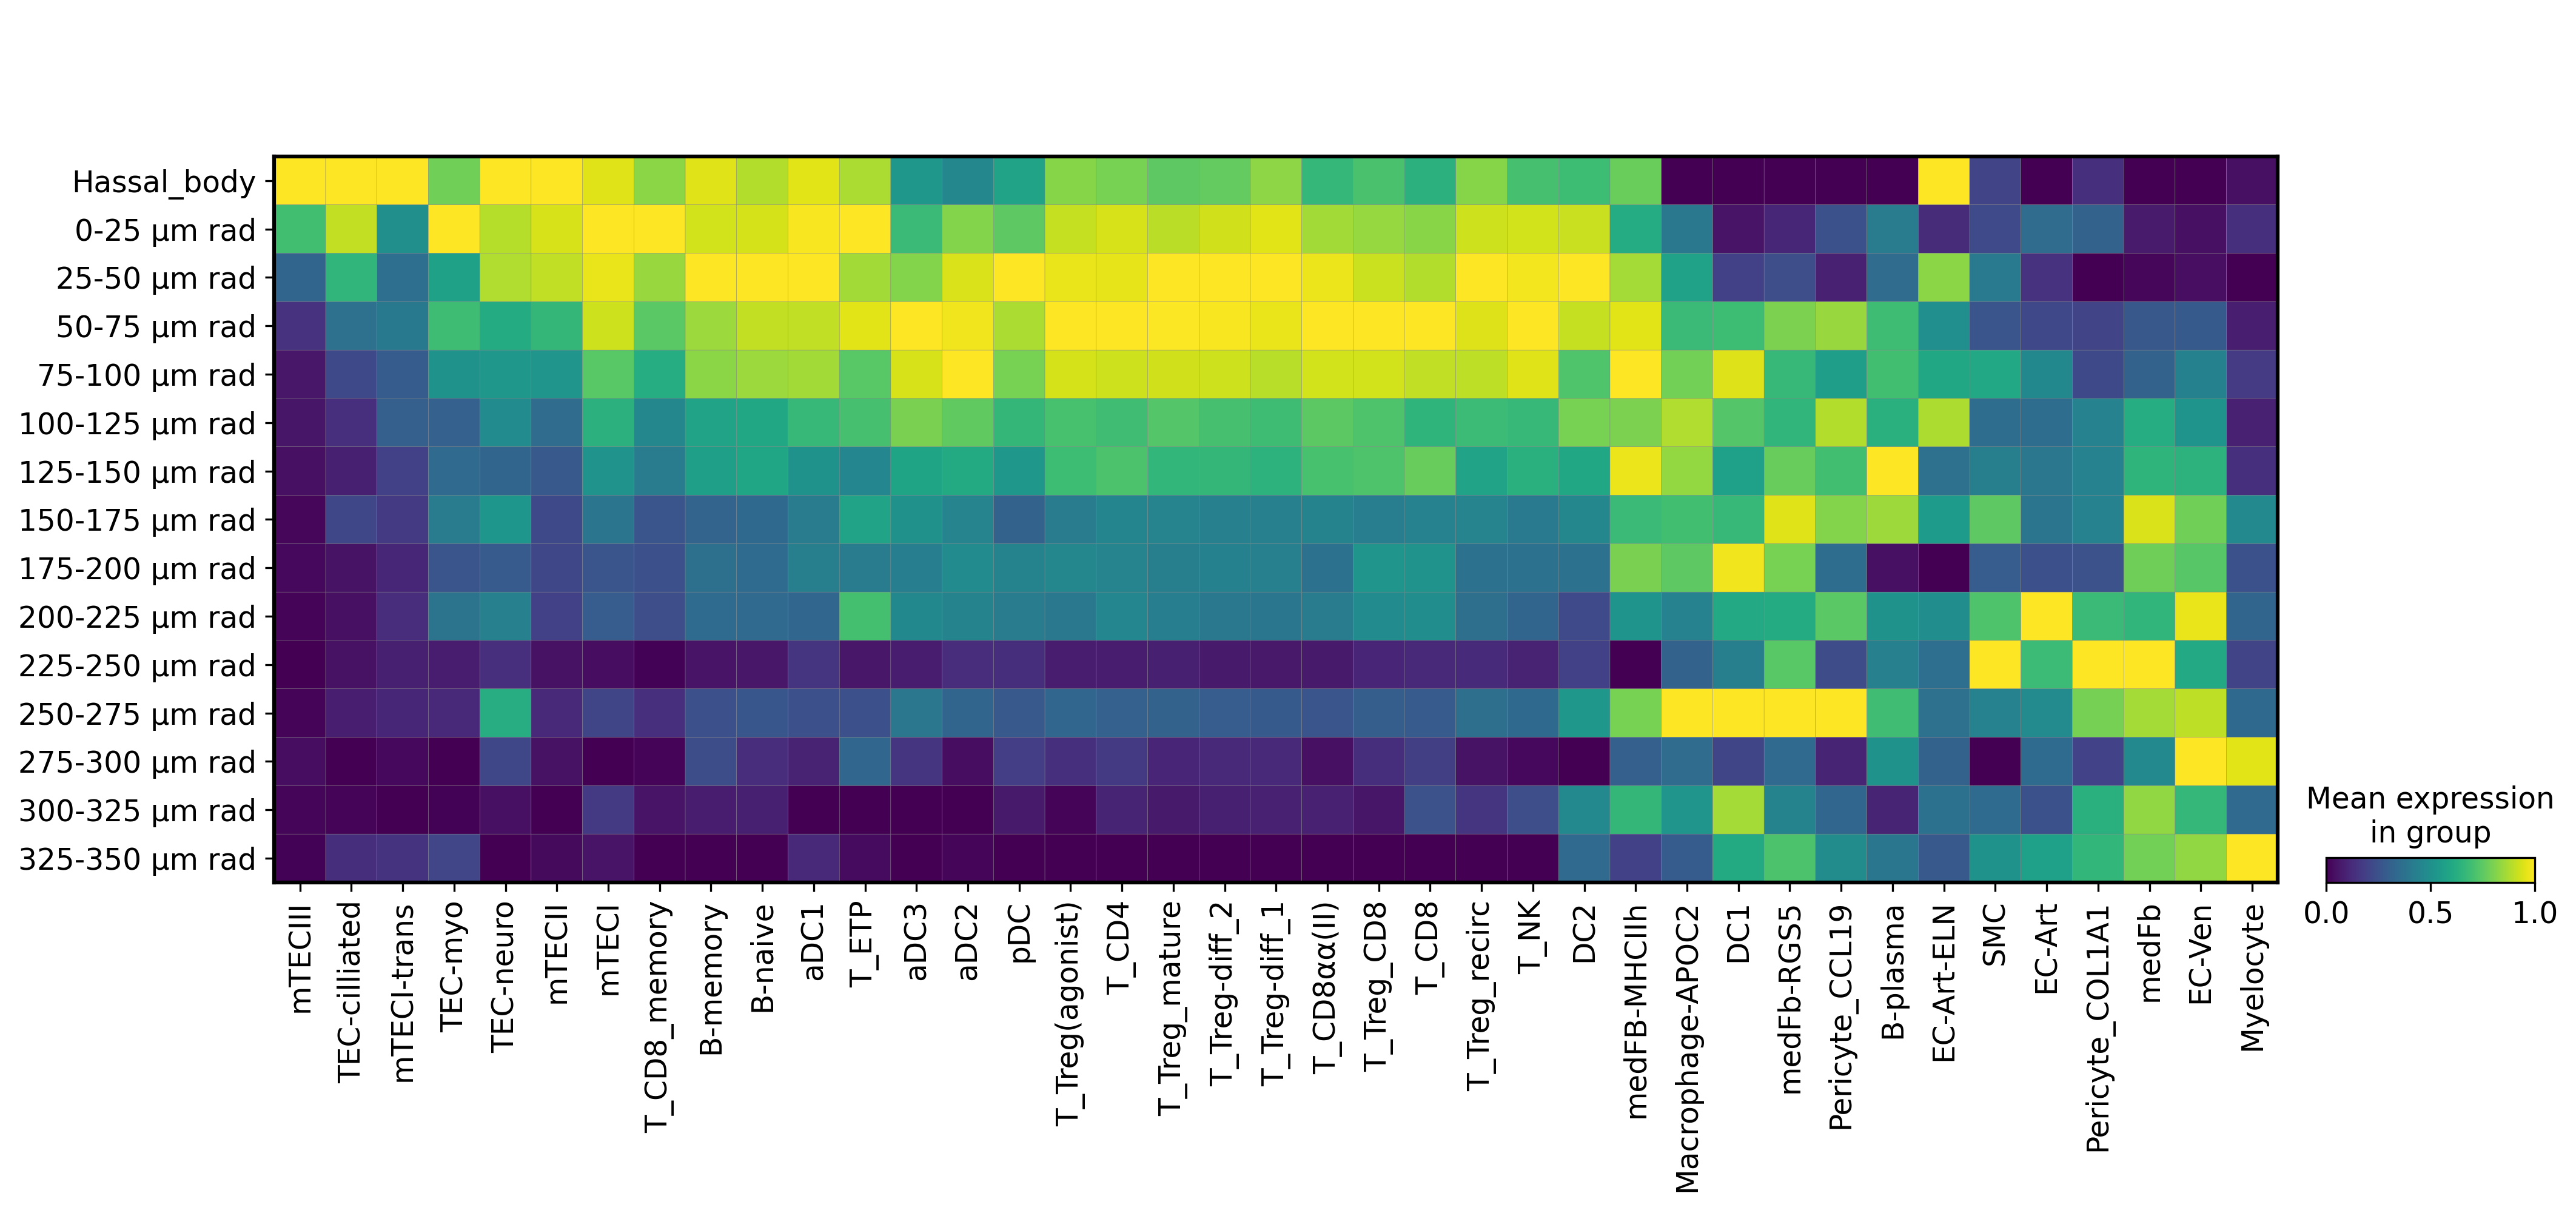

In [327]:
# cluster selected_genes by expression profiles across bins for HC
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import linkage, dendrogram, optimal_leaf_ordering

## For correct plotting of the images
import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')


# Subset dataframe, calculate mean expression and standardize
adata_selected = adata_paed_hc_prox[:, adata_paed_hc_prox.var_names.isin(hc_ctypes)]
adata_selected.X
mean_expression_df = pd.DataFrame(adata_selected.X.toarray(), 
                                  columns=adata_selected.var_names, 
                                  index=adata_selected.obs_names).groupby(adata_selected.obs['Hassal_rad']).mean()
mean_expression_std = pd.DataFrame(scale(mean_expression_df, axis=0),
                                   index=mean_expression_df.index,
                                   columns=mean_expression_df.columns)

# Create dendrogram
transposed_df = mean_expression_std.transpose()
Z = linkage(transposed_df, method='ward')
Z_ordered = optimal_leaf_ordering(Z, transposed_df)
dn = dendrogram(Z_ordered, orientation='top', labels=transposed_df.index, leaf_font_size=5,p=10,color_threshold=2)
#dn = dendrogram(Z, orientation='top', labels=transposed_df.index, leaf_font_size=5,p=10,color_threshold=2)

# Set plotting preferences
plt.grid(False)
plt.rcParams['figure.facecolor'] = 'white'
for spine in plt.gca().spines.values(): spine.set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# Get and print gene order
gene_order = [transposed_df.index[i] for i in dn['leaves']]
print(gene_order)

# Save the dendrogram figure as a PDF
#plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/figures/dendrogram_paed.pdf')

plt.savefig('figures/HC_bins_ctype_associations.pdf')
plt.show()

# Create matrix plot using scanpy
dp = sc.pl.dotplot(adata_paed_hc_prox, var_names = gene_order, groupby = 'Hassal_rad2',  
                   cmap = 'viridis', standard_scale = "var", return_fig=True)
dp.add_totals()
dp.savefig('figures/HC_bins_ctype_associations_dotplot_norm.pdf')
sc.pl.matrixplot(adata_paed_hc_prox, var_names = gene_order, groupby = 'Hassal_rad2',  
                   cmap = 'viridis', standard_scale = "var")